<h1 align="center">Introduction to Machine Learning - 25737-2</h1>
<h4 align="center">Dr. R. Fatemi Zadeh</h4>
<h4 align="center">Sharif University of Technology, Fall 2024</h4>


**<font color='red'>Plagiarism is strongly prohibited!</font>**


**Student Name**: Mohammadparsa Ghaderahmadi

**Student ID**: 401102253



Question 1

In this question, we'll be covering what a **Gaussian Mixture Model** (GMM) is and **implementing it from scratch**.

The idea of using **Gaussian mixtures** was popularised by Duda and Hart in their seminal 1973 text, '[Pattern Classification and Scene Analysis](https://www.semanticscholar.org/paper/Pattern-classification-and-scene-analysis-Duda-Hart/b07ce649d6f6eb636872527104b0209d3edc8188)'. However, it was not until 1977 that the **Expectation-Maximisation (EM)** was presented by Dempster, Laird and Rubin in their paper, '[Maximum Likelihood from Incomplete Data Via the EM Algorithm](https://rss.onlinelibrary.wiley.com/doi/epdf/10.1111/j.2517-6161.1977.tb01600.x)'. 

As we will see later, the EM algorithm is the **learning algorithm** behind a Gaussian Mixture Model (GMM), i.e. it solves the inverse problem by finding the **parameters** of the model.

We will see that **GMMs** produce clusters with **Gaussian distributions**, which are much more **flexible, and reflective** of real-life data.


In [39]:
#add liberies here
import pandas as pd
from scipy.stats import multivariate_normal
import numpy as np
from sklearn.preprocessing import  PowerTransformer
import matplotlib.pyplot as plt

Normal distribution in 1 dimension

The **normal distribution** (or Gaussian distribution) is a continuous probability distribution characterised by its **bell shape**. It has the **probability density function** given by

$$
f_{\mathcal{N}(\mu, \sigma^2)} (x) = \frac{1}{\sqrt{2 \pi \sigma^2}} \exp \left(-\frac{(x-\mu)^2}{2 \sigma^2} \right)
$$

where

* $x$ is a real number
* $\mu$ is the mean
* $\sigma$ is the standard deviation
* $\pi=3.141592653 \ldots$.

<center>
<img src="https://cdn.kastatic.org/ka-perseus-graphie/191a8f604b04f7b6e4a80d04db881c12798856f7.svg" width="400">
</center>

The **multivariate normal distribution** is the generalisation of the normal disitribution to $d$ dimensions. This time, the **probability density function** is given by

$$
f_{\mathcal{N}({\boldsymbol \mu}, {\boldsymbol \Sigma})} (\textbf{x}) = \frac{1}{\sqrt{(2 \pi)^d \det({\boldsymbol \Sigma})}} \exp \left(-\frac{(\textbf{x}-{\boldsymbol \mu})^T {\boldsymbol \Sigma}^{-1} (\textbf{x}-{\boldsymbol \mu})}{2} \right)
$$

where 

* $\textbf{x} = (x_1, \ldots, x_d)$ is a vector of length $d$
* ${\boldsymbol \mu} = (\mu_1, \ldots, \mu_d)$ is the mean vector
* ${\boldsymbol \Sigma}$ is the covariance matrix of size $d \times d$
* $\det({\boldsymbol \Sigma})$ is the determinant of the covariance matrix.

<center>
<img src="https://se.mathworks.com/help/examples/stats/win64/ComputeTheMultivariateNormalPdfExample_01.png" width="400">
</center>

The main difference to the univariate case, is that each feature/dimension can be **correlerated** with the other ones. These correlations are modelled by the **covariance matrix**, which allows for the density function to be **rotated** and **stretched** to model the data as well as possible.


*Prerequisites*

A **Gaussian Mixture** is simply a combination (or mixture) of Gaussian distributions. Note that a Guassian distribution is the same as a **Normal** distribution and I will use these terms interchangeably. It is a **common** distribution that appears in **clustering** problems where the data is sampled randomly from several groups that each follow a normal distribution. 

<hr>

In **1 dimension**, the model is a weighted sum of **univariate** normal distributions:

$$
f_{GMM} (x) = \sum_{j=1}^{k} \pi_j f_{\mathcal{N}(\mu_j, \sigma_{j}^2)} (x)
$$

where 

* k = number of clusters
* x is a real number
* $f_{\mathcal{N}(\mu, \sigma^2)}$ is the density of a normal distribution with mean $\mu$ and variance $\sigma^2$
* $\pi = (\pi_1, ..., \pi_k)$ are the weights subject to

$$
0 \leq \pi_j \leq 1, \quad \sum_{j=1}^{k} \pi_j = 1.
$$

<hr>

In **d dimensions**, the model is a weighted sum of **multivariate** normal distributions:

$$
f_{GMM} (\textbf{x}) = \sum_{j=1}^{k} \pi_j f_{\mathcal{N}({\boldsymbol \mu}_j, {\boldsymbol \Sigma}_{j})} (\textbf{x})
$$

where

* $\textbf{x} = (x_1, \ldots, x_d)$ is now a vector of length $d$
* $f_{\mathcal{N}({\boldsymbol \mu}_j, {\boldsymbol \Sigma}_{j})}$ is the density of a **multivariate** normal distribution with mean vector ${\boldsymbol \mu}$ and covariance matrix ${\boldsymbol \Sigma}$
* $\pi = (\pi_1, ..., \pi_k)$ are the weights subject to the same conditions as before.


**Bayes' theorem**

The more **general version** of the formula, which we will also use, is given by

$$
\mathbb{P}(A_j | B) = \frac{\mathbb{P}(B | A_j) \mathbb{P}(A_j)}{\sum_{t} \mathbb{P}(B | A_t) \mathbb{P}(A_t)}.
$$

This is used when you need to **compare several posterior distributions** and choose the most probable one. 

1. Example in 1D


Suppose that every month for a year, you **survey random people** from the population and ask them whether they **approve** of the prime minister/president or not. We will use Boris Johnson as an example. As you might expect, people who **support** his party (the Conservatives) are **more likely** to approve of him, whilst people who support the main **opposition** party (Labour) are **less likely** to approve of him. The distribution produced is a Gaussian Mixture.

Generate plots showing the approval ratings for both parties and their mixed distribution(similar to shown plots)?

c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, Categorica

<Axes: xlabel='value', ylabel='Count'>

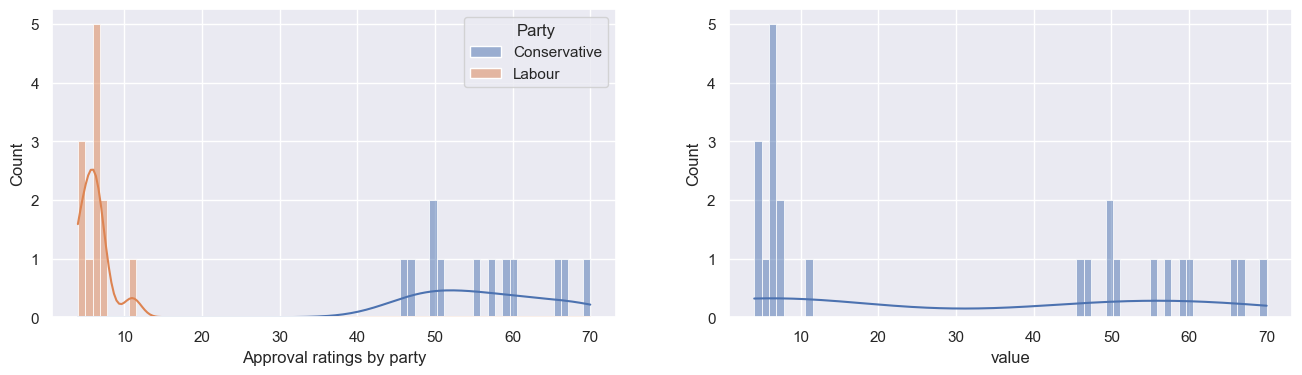

In [38]:
# Monthly approval ratings for Boris Johnson (dates: Aug 2021- July 2022, source: YouGov)
import seaborn as sns
df_approval = pd.DataFrame({'Conservative': [67,70,66,57,47,46,50,60,59,55,51,50], 'Labour': [11,7,7,6,6,4,6,4,6,6,5,4]})
df = df_approval.melt(var_name='Party', value_name='Approval ratings by party')

plt.figure(figsize=(16, 4))
sns.set_theme()
plt.subplot(1, 2, 1)
sns.histplot(df, x='Approval ratings by party', hue='Party', kde=True,  bins=70)
plt.subplot(1, 2, 2)
sns.histplot(df_approval.melt(value_vars=['Conservative', 'Labour'])['value'], kde=True, bins=70)
#your code

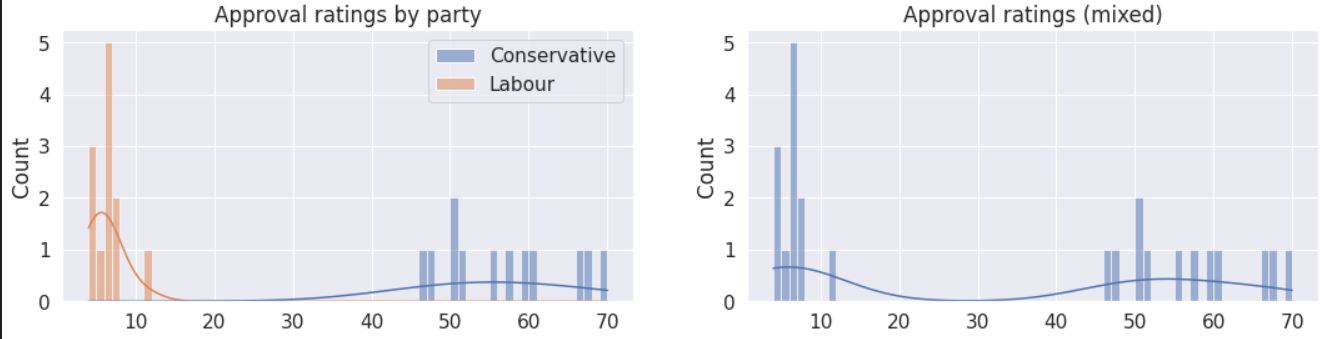

How do plots change if we included data of **additional** parties (like Liberal Democrats, Greens, etc)?
it depends on how that party is distributed but we can say the final plot may be smoother

2. Example in 2D

For this example, we will select 2 features from the famous **Iris dataset**. This contains observations of flowers, like petal lengths, for **3 different species**, so k=3.

Loads the Iris dataset and selects the 'sepal_length', 'petal_length', and 'species' columns.

Creates a 2D scatter plot of 'sepal_length' versus 'petal_length', coloring the points based on species.

Estimates a 2D Gaussian mixture model for each species using the 'sepal_length' and 'petal_length' features, and plots the resulting Gaussian mixture as a 3D surface plot.

Make sure to use the multivariate_normal.pdf function for estimating the Gaussian mixture and include proper titles and axis labels for the plots.

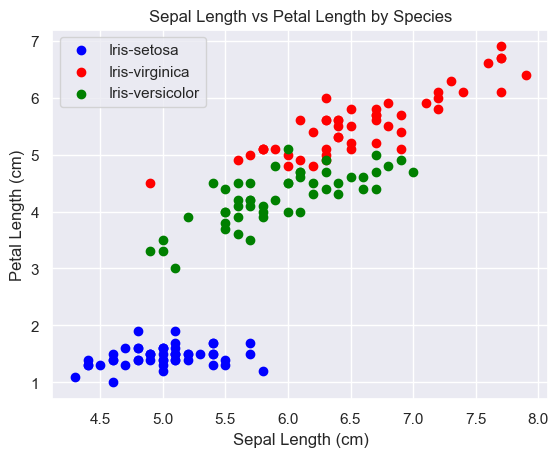

In [42]:
#code here
df = pd.read_csv('IRIS.csv')
colors = {'Iris-setosa' : 'blue', 'Iris-virginica' : 'red', 'Iris-versicolor' : 'green'}
for spicy, color in colors.items():
    sub = df[df['species'] == spicy]
    plt.scatter(sub['sepal_length'], sub['petal_length'], color=color, label=spicy)
plt.title("Sepal Length vs Petal Length by Species")
plt.xlabel("Sepal Length (cm)")
plt.ylabel("Petal Length (cm)")
plt.grid(True)
plt.legend()

In [43]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


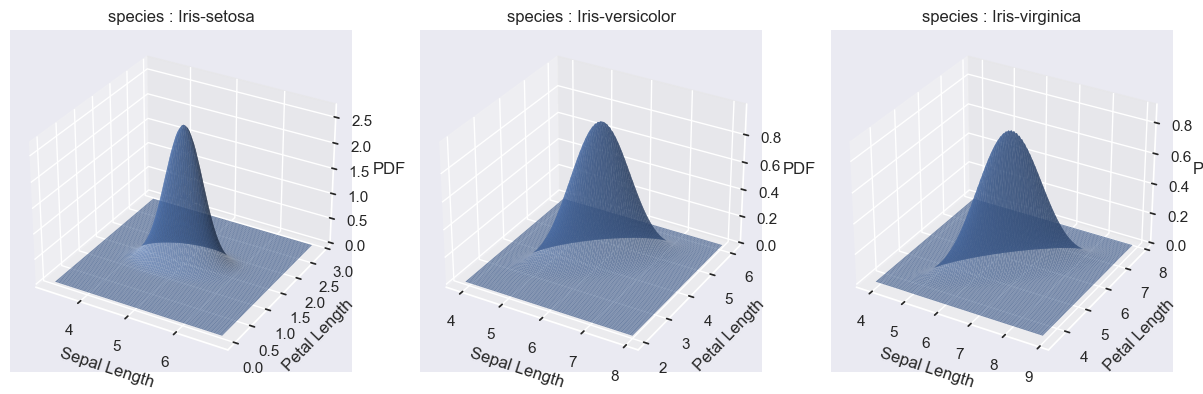

In [45]:
df_IRIS = df[['sepal_length', 'petal_length', 'species']]
fig = plt.figure(figsize=(15, 5))

for i, species in enumerate(df_IRIS['species'].unique()):
    ax = fig.add_subplot(1, 3, i+1, projection='3d')
    ax.set_title(f'species : {species}')

    data = df_IRIS[df_IRIS['species'] == species][['sepal_length', 'petal_length']].values

    mean = np.mean(data, axis=0)
    cov = np.cov(data, rowvar=False)

    X, Y = np.meshgrid(np.linspace(data[:, 0].min()-1, data[:, 0].max()+1, 100), np.linspace(data[:, 1].min()-1, data[:, 1].max()+1, 100))
    PDF = multivariate_normal(mean, cov).pdf(np.dstack((X, Y)))

    ax.plot_surface(X, Y, PDF, rstride=1, cstride=1, alpha=0.7, edgecolor='none')
    ax.set_xlabel("Sepal Length")
    ax.set_ylabel("Petal Length")
    ax.set_zlabel("PDF")


Given the **density plot**, and the fact that we're searching for 3 clusters, how do we decide which data points belong **together** (i.e. correspond to the same flower), and which ones don't?

**Expectation-Maximisation algorithm**


We'll start by building the **intuition** on how EM works by working through an example in 1 dimension. We will then formalise the general algorithm in d dimensions afterwards. 

Let's start with some **data** that we think has been generated by a **Gaussian mixture** with **k=2** classes in **1 dimension**.



## Initialisation

The **first task** for the algorithm is to **randomly choose parameters** $\mu_1, \mu_2, \sigma_1^2, \sigma_2^2$ for the two normal distributions. We also need to choose some **weights** $\pi_1, \pi_2$, which tells us the **relative heights** of the curves. A good choice for the initial weights is $(\pi_1, \pi_2)=(0.5,0.5)$, i.e. the uniform distribution.

## E-step

The **next step** (called the E-step) is to calculate how likely does each data point belong to each **class**. For example, consider the **rightmost point** on the diagram. Even though it is very **far from both** the green and orange distributions (and so is **unlikely** to have been generated from either of them), it is much **closer** to the green one. This means it is **more likely** to have been generated from the green distribution than the orange one, even if these probabilites are small. 

<hr>

**Bayes' formula** uses this idea of likelihood to find the probabilities we want:

$$
a_i = \mathbb{P}(C_1 | x_i) = \frac{\mathbb{P}(x_i|C_1) \mathbb{P}(C_1)}{\mathbb{P}(x_i|C_1) \mathbb{P}(C_1) + \mathbb{P}(x_i|C_2) \mathbb{P}(C_2)} = \frac{\mathbb{P}(x_i|C_1) \pi_1}{\mathbb{P}(x_i|C_1) \pi_1 + \mathbb{P}(x_i|C_2) \pi_2}
$$

where the **likelihood** is given by

$$
\mathbb{P}(x_i|C_1) = \frac{1}{\sqrt{2 \pi \sigma_1^2}} \exp \left(-\frac{(x_i-\mu_1)^2}{2 \sigma_1^2} \right)
$$

<hr>

Note that since there are only $k=2$ classes, we have $b_i = \mathbb{P}(C_2 | x_i) = 1 - \mathbb{P}(C_1 | x_i) = 1-a_i$. 

E.g. if $a_i = 0.99$ then $b_i = 0.01$. 

<hr>

So now we can think of the data points as being a **bit of orange** and a **bit of green** together. The exact proportion depends on the probabilities.

## M-step

Now we can **update the parameters** (called the M-step). Unlike in k-Means, which assigns classes using the **maximum** of these probabilites, GMMs use the **probabilities** to estimate the means and variances as weighted averages. 

For the **orange** distribution:

$$
\mu_1 = \frac{\sum_{i=1}^{n} a_i x_i}{\sum_{i=1}^{n} a_i}, \quad \sigma_1^2 = \frac{\sum_{i=1}^{n} a_i (x_i - \mu_1)^2}{\sum_{i=1}^{n} a_i}
$$

And for the **green** distribution:
$$
\mu_2 = \frac{\sum_{i=1}^{n} b_i x_i}{\sum_{i=1}^{n} b_i}, \quad \sigma_2^2 = \frac{\sum_{i=1}^{n} b_i (x_i - \mu_1)^2}{\sum_{i=1}^{n} b_i}
$$

These are just **weighted averages** of the usual formulas for mean and variance. The idea is that points **closest** to the distribution **contribute the most** to updating the correspoding parameters. 

<hr>

And we can't forget about updating the weights as well. This is done by **averaging** over the posterior probabilities:

$$
\pi_1 = \frac{\sum_{i=1}^{n} a_i}{n}, \quad \pi_2 = \frac{\sum_{i=1}^{n} b_i}{n} 
$$

You can think of this as calculating the **proportion** of the data that each cluster is describing. 

<hr>

And all that is left to do is to **iterate** until convergence! 


Implementation

You are given the partial implementation of a Gaussian Mixture Model (GMM) class. Complete the following parts of the code

In [57]:
from scipy.stats import norm
class GMM:
    def __init__(self, k, max_iter=100, random_state = 0):
        self.k = k
        self.max_iter = max_iter
        self.random_state = random_state

    def initialise(self, X):
        self.shape = X.shape
        self.n, self.d = self.shape
        
        self.pi = np.full(shape=self.k, fill_value=1/self.k)
        self.responsibilities = np.full(shape=self.shape, fill_value=1/self.k)
        
        # TODO: Initialize mu and sigma here
        index = np.random.choice(self.n, self.k, replace=False)
        self.mu = X[index]
        self.sigma = np.array([np.eye(self.d)] * self.k) #here we build covariance matrix but since it's diagonal the main diag is variance

    def E_step(self, X):
        # TODO: Update the responsibilities by holding mu and sigma constant
        self.responsibilities = self.predict_proba(X)
        
    
    def M_step(self, X):
        # TODO: Update pi, mu, and sigma by holding responsibilities constant
        a_sum = np.sum(self.responsibilities, axis=0)
        self.pi = a_sum / self.n

        self.mu = np.dot(self.responsibilities.T, X) / a_sum[:, np.newaxis]
        self.sigma = np.zeros((self.k, self.d, self.d))
        self.sigma = [(np.dot(self.responsibilities[:, i] * (X - self.mu[i]).T, (X - self.mu[i])) / a_sum[i]) for i in range(self.k)]

    def fit(self, X):
        self.initialise(X)
        
        for iteration in range(self.max_iter):
            self.E_step(X)
            self.M_step(X)
    
    def predict_proba(self, X):
        likelihood = np.zeros((self.n, self.k))
        for j in range(self.k):
            distribution = multivariate_normal(mean=self.mu[j], cov=self.sigma[j])
            likelihood[:,j] = distribution.pdf(X)
        
        numerator = likelihood * self.pi
        denominator = numerator.sum(axis=1)[:, np.newaxis]
        responsibilities = numerator / denominator
        return responsibilities
    
    def predict(self, X):
        responsibilities = self.predict_proba(X)
        return np.argmax(responsibilities, axis=1)
    
    def fit_predict(self, X):
        self.fit(X)
        predictions = self.predict(X)
        return predictions

We will apply it to this months TPS competition which is on **unsupervised clustering**.
The dataset is made up of **29 features** and **98,000** data points and the task is to **cluster the data**.

In [58]:
data=pd.read_csv('data.csv', index_col='id')

# Preprocess data
scaled_data = pd.DataFrame(PowerTransformer().fit_transform(data))
scaled_data.columns = data.columns
drop_feats = [f'f_0{i}' for i in range(7)]
drop_feats = drop_feats + [f'f_{i}' for i in range(14,22)]
X = scaled_data.drop(drop_feats, axis=1).values

c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:767: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if not hasattr(array, "sparse") and array.dtypes.apply(is_sparse).any():
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:605: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype):
c:\Users\mohammmadparsa\Quera\qenv\lib\site-packages\sklearn\utils\validation.py:614: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(pd_dtype) or not is_extension_array_dtype(pd_dtype):


In [59]:
%%time

# Gaussian Mixture Model
gmm = GMM(k=7, max_iter=100)
preds = gmm.fit_predict(X)

CPU times: total: 7.36 s
Wall time: 22.7 s


Question 2

In this question, we are examining two common estimators of variance. The first estimator, related to MLE (Maximum Likelihood Estimation), is:

$$
\hat{\sigma}^2 = \frac{1}{n} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

The next estimator, including Bessel's correction, is:

$$
\hat{\sigma}^2 = \frac{1}{n-1} \sum_{i=1}^{n} (x_i - \bar{x})^2
$$

* Generate 1000 samples from a Normal distribution $ \mathcal{N}(2, 2) $ and calculate both estimators for each sample.

In [62]:
X = np.random.normal(2, 2, 1000)
MLE = np.mean((X - np.mean(X)) ** 2)
MLE_Bessel = np.sum((X - np.mean(X)) ** 2) / 999.0
print(f'MLE : {MLE}')
print(f'Bessel\'s correction : {MLE_Bessel}')

MLE : 3.9417150815353863
Bessel's correction : 3.945660742277664


- Now, plot these values on a graph.
- Considering the graph, are these two estimators consistent with each other?

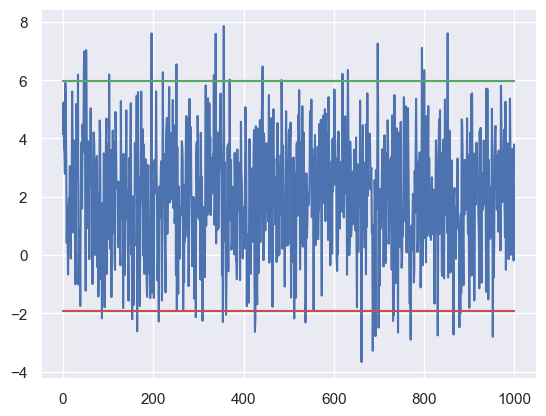

In [66]:
plt.plot(np.arange(X.shape[0]), X)
mu = X.mean()
plt.plot(np.arange(X.shape[0]), [mu + MLE]*X.shape[0] , "r")
plt.plot(np.arange(X.shape[0]), [mu - MLE]*X.shape[0] , "g")

plt.plot(np.arange(X.shape[0]), [mu + MLE_Bessel]*X.shape[0] , "g")
plt.plot(np.arange(X.shape[0]), [mu - MLE_Bessel]*X.shape[0] , "r")

Answer:

Generate 100,000 data samples from the same distribution and calculate the mean of each estimator.

Considering these values, are the two estimators unbiased?

In [72]:
Y = np.random.normal(2, 2, 100000)
MLE = np.mean((Y - np.mean(Y)) ** 2)
MLE_Bessel = np.sum((Y - np.mean(Y)) ** 2) / 99999.0
print(f'MLE : {MLE}')
print(f'Bessel\'s correction : {MLE_Bessel}')


MLE : 3.9929880788877483
Bessel's correction : 3.99302800916784


Answer: